In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

from datetime import datetime
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

import wrangle

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-dark-palette')
plt.rc('font', size=16)

In [3]:
# use a function to pull in data
nem, holo, nem_hr, holo_hr = wrangle.get_crypto_data()
nem.shape, holo.shape, nem_hr.shape, holo_hr.shape

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


((1533, 6), (1361, 6), (1093, 6), (1094, 6))

In [4]:
# use a function to split data for NEM
nem_train, nem_validate, nem_test = wrangle.split_time_series_data(nem)
nem_train.shape, nem_validate.shape, nem_test.shape

((766, 6), (459, 6), (308, 6))

In [5]:
# drop columns that will not be used in the prediction
nem_train, nem_validate, nem_test = pd.DataFrame(nem_train['Close']),\
                                    pd.DataFrame(nem_validate['Close']),\
                                    pd.DataFrame(nem_test['Close'])

In [8]:
# use a function to split data for HOLO
holo_train, holo_validate, holo_test = wrangle.split_time_series_data(holo)
holo_train.shape, holo_validate.shape, holo_test.shape

((680, 6), (408, 6), (273, 6))

In [9]:
# drop columns that will not be used in the prediction
holo_train, holo_validate, holo_test = pd.DataFrame(holo_train['Close']),\
                                    pd.DataFrame(holo_validate['Close']),\
                                    pd.DataFrame(holo_test['Close'])

In [80]:
# compute rmse to evaluate model
def evaluate(validate_set, target_var):
    rmse = round(sqrt(mean_squared_error(validate_set[target_var], yhat_df[target_var])), 5)
    return rmse


# plot original and predicted values
def plot_and_eval(train_set, validate_set, target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train_set[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate_set[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var], label = 'Prediction', linewidth = 1)
    plt.title(target_var)
    plt.legend()
    rmse = evaluate(validate_set, target_var)
    print(f'{target_var} -- RMSE: {rmse}')
    plt.show()
    

# create df object to append to
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# append evaluations to a df for comparison
def append_eval_df(model_type, validate_set, target_var):
    rmse = evaluate(validate_set, target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

### Establish a baseline model

<AxesSubplot:xlabel='Date'>

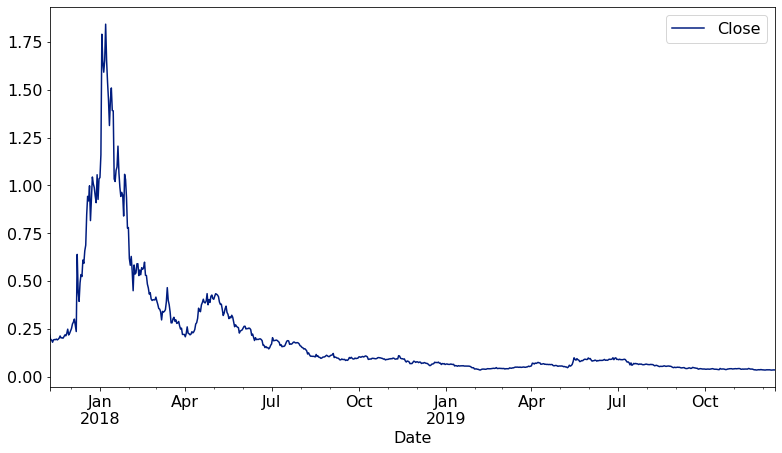

In [7]:
# plot data
nem_train.plot()

**For NEM, I am going to use the simple average for the 2019 data as the price has been pretty consistent since then**
**I will use RMSE as the evaluation metric for my models**

In [71]:
# predict using mean for 2019 close data
close = nem_train.Close.mean()

yhat_df = pd.DataFrame({'Close': [close]}, index = nem_validate.index)

Close -- RMSE: 0.1587


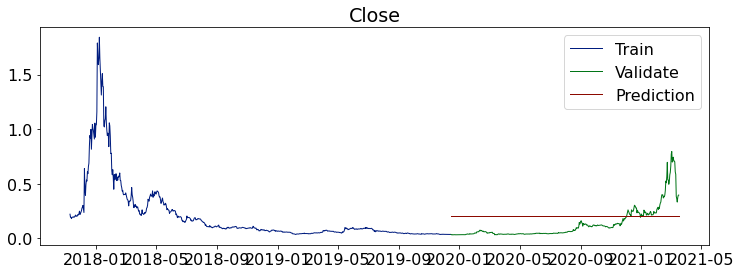

In [73]:
# plot actual vs predicted
plot_and_eval(nem_train, nem_validate, 'Close')

In [77]:
nem_train.columns

Index(['Close'], dtype='object')

In [81]:
# append metrics to evaluate dataframe
for col in nem_train.columns:
#     print(col)
    eval_df = append_eval_df(model_type='baseline_simple_average', validate_set=nem_validate,
                             target_var=col)
eval_df

,model_type,target_var,rmse
0,baseline_simple_average,Close,0.1587


<AxesSubplot:xlabel='Date'>

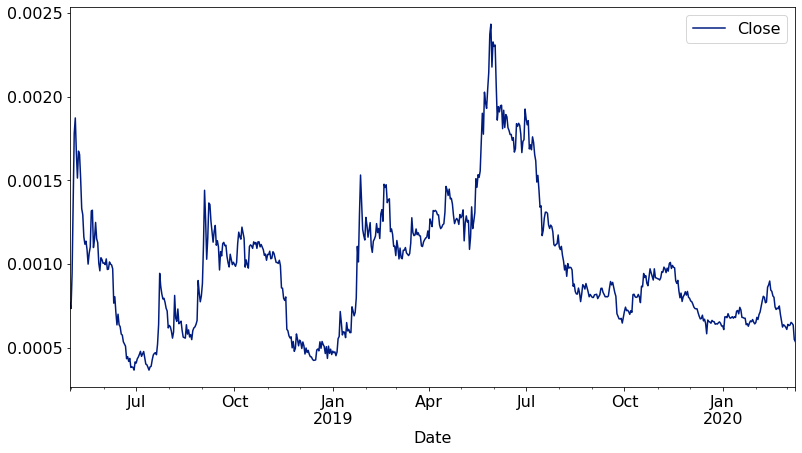

In [10]:
# plot data
holo_train.plot()